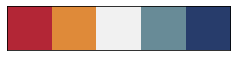

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def custom_pallete(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

tableau = ["#B32636","#DF8A39","#F1F1F1","#688B97","#273C6B"]
custom_pallete(tableau)

In [ ]:
df = pd.read_csv("/content/MoviesOnStreamingPlatforms_updated.csv")
df = df.iloc[:,1:12]
df = df.head(10)
df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0


In [ ]:
!pip install IMDbPY

from imdb import IMDb

ia = IMDb()

     |████████████████████████████████| 298 kB 8.8 MB/s 


In [ ]:
mid = ia.search_movie("Inception")
mid[0]

<Movie id:1375666[http] title:_Inception (2010)_>

In [ ]:
movie = ia.get_movie('1375666')

In [ ]:
print('Directors:')
for director in movie['directors']:
    print(director['name'])

Directors:
Christopher Nolan


In [ ]:
print('Genres:')
for genre in movie['genres']:
    print(genre)

Genres:
Action
Adventure
Sci-Fi
Thriller


In [ ]:
print('Countries:')
for cont in movie['countries']:
    print(cont)

Countries:
United States
United Kingdom


In [ ]:
print('Languages:')
for lang in movie['languages']:
    print(lang)

Languages:
English
Japanese
French


In [ ]:
print('Runtime:')
for run in movie['runtime']:
    print(run)

Runtime:
148


In [ ]:
i=0
count_id=0
count_d=0
count_g=0
count_co=0
count_l=0
count_r=0

m_director=[]
m_genre=[]
m_country=[]
m_language=[]
m_runtime=[]

while(i<len(df.index)):
    val_type = df['Type'].values[i]
    if(val_type==0):
        val_movie = df['Title'].values[i]
        movies = ia.search_movie(val_movie)
        if(len(movies)!=0):
            movid = movies[0].movieID

            movie = ia.get_movie(movid)
            print(movie)

            movie_directors=""
            movie_genres=""
            movie_country=""
            movie_language=""
            movie_runtime=""
            c1=0
            c2=0
            c4=0
            c5=0
            c6=0
            movid=int(movid)
            if(movid>0):
                count_id+=1;
                print(count_id)

                try:
                    for director in movie['directors']:
                        if(c1==0):
                            count_d+=1
                            movie_directors =director['name']

                        else:
                            movie_directors = movie_directors+","+ director['name']

                        c1+=1
                    m_director.append(movie_directors)
                except:
                    m_director.append("NA")

                try:
                    for genre in movie['genres']:
                        if(c2==0):
                            count_g+=1
                            movie_genres = genre

                        else:
                            movie_genres = movie_genres+"," +genre

                        c2+=1
                    m_genre.append(movie_genres)
                except:
                    m_genre.append("NA")

                try:
                    for countries in movie['countries']:
                        if(c4==0):
                            count_co+=1
                            movie_country = countries

                        else:
                            movie_country = movie_country+"," +countries

                        c4+=1
                    m_country.append(movie_country)
                except:
                    m_country.append("NA")

                try:
                    for languages in movie['languages']:
                        if(c5==0):
                            count_l+=1
                            movie_language = languages

                        else:
                            movie_language = movie_language+"," +languages

                        c5+=1
                    m_language.append(movie_language)
                except:
                    m_language.append("NA")

                try:
                    for runtime in movie['runtimes']:
                        if(c6==0):
                            count_r+=1
                            movie_runtime = runtime

                        else:
                            movie_runtime = movie_runtime+"," +runtime

                        c6+=1
                    m_runtime.append(movie_runtime)
                except:
                    m_runtime.append("NA")
      
            else:
                pass
        else:
            m_director.append("NA")
            m_genre.append("NA")
            m_country.append("NA")
            m_language.append("NA")
            m_runtime.append("NA")
    else:
        pass
    i=i+1

Inception
1
The Matrix
2
Avengers: Infinity War
3
Back to the Future
4
The Good, the Bad and the Ugly
5
Spider-Man: Into the Spider-Verse
6
The Pianist
7
Django Unchained
8
Indiana Jones and the Raiders of the Lost Ark
9
Inglourious Basterds
10


In [ ]:
df['Directors'] = m_director
df['Genres'] = m_genre
df['Country'] = m_country
df['Language'] = m_language
df['Runtime'] = m_runtime

df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi","United States,Australia",English,136
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,"Adventure,Western","Italy,Spain,West Germany","Italian,English",161
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Comedy,Family,Fanta...",United States,"English,Spanish",117
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","France,Poland,Germany,United Kingdom","English,German,Russian",150
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153


In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1598629189115' style='position: relative'><noscript><a href='#'><img alt='Average IMDb rating of movies produced in countries ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;Moviesavailableonstreamingplatforms&#47;AvgIMDbratings&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;Moviesavailableonstreamingplatforms&#47;AvgIMDbratings?:language=en-GB&amp;:embed=y&amp;:display_count=y' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;Moviesavailableonstreamingplatforms&#47;AvgIMDbratings&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598629189115');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1598629292160' style='position: relative'><noscript><a href='#'><img alt='Movies produced during a particular year vs streaming platform' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;Moviesavailableonstreamingplatforms&#47;MovieyearvsPlatform&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Moviesavailableonstreamingplatforms&#47;MovieyearvsPlatform' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;Moviesavailableonstreamingplatforms&#47;MovieyearvsPlatform&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598629292160');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1598629363727' style='position: relative'><noscript><a href='#'><img alt='Movies recommended for selected age groups vs streaming platform' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;Moviesavailableonstreamingplatforms&#47;AgevsPlatform&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Moviesavailableonstreamingplatforms&#47;AgevsPlatform' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;Moviesavailableonstreamingplatforms&#47;AgevsPlatform&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598629363727');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<iframe width="600px" height="200px" src="https://public.tableau.com/views/Moviesavailableonstreamingplatforms/Movieavailability?:language=en-GB&:display_count=y&:showVizHome=no&:origin=viz_share_link">
</iframe>

In [ ]:
%%HTML
<iframe width="700px" height="894px" src="https://public.tableau.com/views/Moviesavailableonstreamingplatforms/Moviesavailableonstreamingapplications?:language=en-GB&:display_count=y&:showVizHome=no&:origin=viz_share_link">
</iframe>